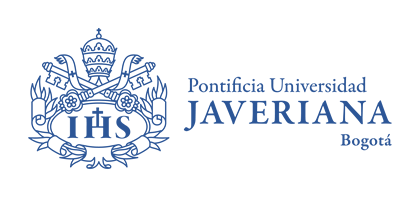

#**Entrega 3 - Proyecto Imágenes tumores cerebrales**

###**Realizado por:**

- Carlos Másmela
- Yudy Pedraza

###**Resumen:**

El siguiente Notebook tiene como propósito mostrar modelos de clasificación realizados a las imágenes de tumores cerebrales dispuestas para el desarrollo de este proyecto.

# **Librerías**

In [1]:
from PIL import Image
import PIL
import os
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
from skimage.io import imread, imshow
from skimage.filters import prewitt_h, prewitt_v
import matplotlib.pyplot as plt
import cv2
import numpy as np
import plotly.express as px
import plotly.subplots
import plotly.graph_objs as go
import scipy.ndimage
import imghdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Lectura datos**

In [2]:
!git clone "https://github.com/candemas97/tumores_cerebrales"

Cloning into 'tumores_cerebrales'...
remote: Enumerating objects: 6762, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 6762 (delta 5), reused 21 (delta 3), pack-reused 6739
Receiving objects: 100% (6762/6762), 204.33 MiB | 39.97 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (7029/7029), done.


In [3]:
ruta_local_training_glioma = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma'
ruta_local_training_meningioma = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/meningioma'
ruta_local_training_pituitary = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/pituitary'
ruta_local_training_notumor = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/notumor'
ruta_local_testing_glioma = '/content/tumores_cerebrales/Imágenes Cerebrales/Testing/glioma'
ruta_local_testing_meningioma = '/content/tumores_cerebrales/Imágenes Cerebrales/Testing/meningioma'
ruta_local_testing_pituitary = '/content/tumores_cerebrales/Imágenes Cerebrales/Testing/pituitary'
ruta_local_testing_notumor = '/content/tumores_cerebrales/Imágenes Cerebrales/Testing/notumor'

In [4]:
def leer_archivos_en_ruta(ruta: str) -> list:
  """
  Función encargada de leer todos los archivos que contiene cada carpeta
  """
  archivos = os.listdir(ruta)
  nombre_seccion = ruta.split("/")[-1]
  print(f"Cantidad de archivos - {nombre_seccion}: {len(archivos)}")
  print(f"{archivos[:5]}\n")
  return archivos

In [5]:
#Leer y revisar archivos
archivos_glioma = leer_archivos_en_ruta(ruta_local_training_glioma)
archivos_meningioma = leer_archivos_en_ruta(ruta_local_training_meningioma)
archivos_pituitary = leer_archivos_en_ruta(ruta_local_training_pituitary)
archivos_notumor = leer_archivos_en_ruta(ruta_local_training_notumor)

Cantidad de archivos - glioma: 1321
['Tr-gl_0046.jpg', 'Tr-gl_1071.jpg', 'Tr-gl_1146.jpg', 'Tr-gl_0281.jpg', 'Tr-gl_0155.jpg']

Cantidad de archivos - meningioma: 1339
['Tr-me_0214.jpg', 'Tr-me_0046.jpg', 'Tr-me_1081.jpg', 'Tr-me_0256.jpg', 'Tr-me_0547.jpg']

Cantidad de archivos - pituitary: 1457
['Tr-pi_0064.jpg', 'Tr-pi_0502.jpg', 'Tr-pi_0167.jpg', 'Tr-pi_1094.jpg', 'Tr-pi_1327.jpg']

Cantidad de archivos - notumor: 1595
['Tr-no_0604.jpg', 'Tr-noTr_0004.jpg', 'Tr-no_1322.jpg', 'Tr-no_0924.jpg', 'Tr-no_1324.jpg']



In [6]:
def ver_tamano_cada_imagen(ruta: str, imprimir_todo: bool = False) -> None:
  arc = os.listdir(ruta)
  nombre_seccion = ruta.split("/")[-1].upper()

  # Crear una lista para almacenar los datos de la tabla
  tabla = {'Nombre Archivo': [],
          'Tamano': []}

  # Recorrer cada archivo en el directorio
  for archivo in arc:
      if archivo.endswith(('.jpg')):  # Puedes ajustar las extensiones compatibles
          ruta_completa = os.path.join(ruta, archivo)

          # Abrir la imagen
          imagen = Image.open(ruta_completa)

          # Obtener el tamaño de la imagen
          ancho, alto = imagen.size

          # Agregar los datos a la tabla como una tupla
          tabla['Nombre Archivo'].append(archivo)
          tabla['Tamano'].append(f"{ancho}x{alto} píxeles")

  #Ver cantidad de imágenes por tamaño
  tabla_agrupada = pd.DataFrame(tabla).groupby(['Tamano']).count().reset_index()
  cantidad_tamanos = len(tabla_agrupada)
  tabla_agrupada = tabla_agrupada.to_dict()

  #Imprimir títulos
  print(f"\t\t   {nombre_seccion}\n")
  print(f"Cantidad de diversos tamaños de imagen: {cantidad_tamanos}\n")
  print(f"\t\t   TABLA AGRUPADA\n")
  print("Tamaño Imagen\t\t\tCantidad")
  print("--------------------\t\t----------------")
  # Imprimir Tabla agrupada

  for fila in range(cantidad_tamanos):
    print(f"{tabla_agrupada['Tamano'][fila]}\t\t\t{tabla_agrupada['Nombre Archivo'][fila]}")
  print("-"*50, "\n")

  if imprimir_todo == True:
    # Imprimir la tabla total
    print(f"\t\t   TABLA AL DETALLE\n")
    print("Nombre de la imagen\t\t\tTamaño")
    print("--------------------\t\t\t----------------")
    for fila in range(len(tabla['Nombre Archivo'])):
        #if tabla['Tamano'][fila] == "512x512 píxeles":
          print(f"Fila#{fila}: {tabla['Nombre Archivo'][fila]}\t\t\t{tabla['Tamano'][fila]}")
    print("-"*50, "\n")

In [7]:
ver_tamano_cada_imagen(ruta_local_training_glioma, True)

		   GLIOMA

Cantidad de diversos tamaños de imagen: 1

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
512x512 píxeles			1321
-------------------------------------------------- 

		   TABLA AL DETALLE

Nombre de la imagen			Tamaño
--------------------			----------------
Fila#0: Tr-gl_0046.jpg			512x512 píxeles
Fila#1: Tr-gl_1071.jpg			512x512 píxeles
Fila#2: Tr-gl_1146.jpg			512x512 píxeles
Fila#3: Tr-gl_0281.jpg			512x512 píxeles
Fila#4: Tr-gl_0155.jpg			512x512 píxeles
Fila#5: Tr-gl_0084.jpg			512x512 píxeles
Fila#6: Tr-gl_0737.jpg			512x512 píxeles
Fila#7: Tr-gl_0382.jpg			512x512 píxeles
Fila#8: Tr-gl_0111.jpg			512x512 píxeles
Fila#9: Tr-gl_0242.jpg			512x512 píxeles
Fila#10: Tr-gl_0247.jpg			512x512 píxeles
Fila#11: Tr-gl_1204.jpg			512x512 píxeles
Fila#12: Tr-gl_0369.jpg			512x512 píxeles
Fila#13: Tr-gl_0795.jpg			512x512 píxeles
Fila#14: Tr-gl_0148.jpg			512x512 píxeles
Fila#15: Tr-gl_0401.jpg			512x512 píxeles
Fila#16: Tr-gl_0099.jpg			512

In [8]:
ver_tamano_cada_imagen(ruta_local_training_meningioma)

		   MENINGIOMA

Cantidad de diversos tamaños de imagen: 123

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
1149x1019 píxeles			1
1275x1427 píxeles			1
180x218 píxeles			1
200x223 píxeles			2
200x235 píxeles			1
200x236 píxeles			1
200x252 píxeles			1
201x207 píxeles			1
201x251 píxeles			2
202x223 píxeles			1
204x249 píxeles			1
205x251 píxeles			1
206x245 píxeles			1
206x249 píxeles			1
208x243 píxeles			1
209x225 píxeles			1
209x241 píxeles			1
210x240 píxeles			1
211x239 píxeles			1
212x237 píxeles			2
212x238 píxeles			1
213x236 píxeles			1
213x237 píxeles			2
214x216 píxeles			1
214x235 píxeles			1
215x220 píxeles			1
215x234 píxeles			1
216x216 píxeles			1
216x234 píxeles			1
217x232 píxeles			1
219x234 píxeles			1
221x228 píxeles			1
224x216 píxeles			1
224x219 píxeles			1
225x225 píxeles			8
226x212 píxeles			1
226x214 píxeles			1
226x223 píxeles			1
229x223 píxeles			1
230x241 píxeles			1
232x261 píxeles			1
234x216 píxeles			1
238x212 p

In [9]:
ver_tamano_cada_imagen(ruta_local_training_pituitary, True)

		   PITUITARY

Cantidad de diversos tamaños de imagen: 16

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
1280x1280 píxeles			1
1365x1365 píxeles			1
201x210 píxeles			1
202x202 píxeles			1
256x256 píxeles			24
360x378 píxeles			1
400x400 píxeles			1
442x442 píxeles			1
470x432 píxeles			1
474x474 píxeles			2
502x502 píxeles			1
512x512 píxeles			1418
685x681 píxeles			1
721x903 píxeles			1
900x741 píxeles			1
940x900 píxeles			1
-------------------------------------------------- 

		   TABLA AL DETALLE

Nombre de la imagen			Tamaño
--------------------			----------------
Fila#0: Tr-pi_0064.jpg			512x512 píxeles
Fila#1: Tr-pi_0502.jpg			512x512 píxeles
Fila#2: Tr-pi_0167.jpg			512x512 píxeles
Fila#3: Tr-pi_1094.jpg			512x512 píxeles
Fila#4: Tr-pi_1327.jpg			512x512 píxeles
Fila#5: Tr-pi_0384.jpg			512x512 píxeles
Fila#6: Tr-pi_0866.jpg			512x512 píxeles
Fila#7: Tr-pi_0345.jpg			512x512 píxeles
Fila#8: Tr-pi_0041.jpg			940x900 píxeles
Fila#9: Tr-pi

In [10]:
ver_tamano_cada_imagen(ruta_local_training_notumor, True)

		   NOTUMOR

Cantidad de diversos tamaños de imagen: 254

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
1000x583 píxeles			2
1000x714 píxeles			1
1024x1024 píxeles			5
1024x830 píxeles			1
1280x720 píxeles			1
1375x1446 píxeles			1
150x198 píxeles			36
173x201 píxeles			30
177x197 píxeles			7
1920x1080 píxeles			1
192x192 píxeles			27
194x259 píxeles			10
196x257 píxeles			11
200x200 píxeles			1
200x210 píxeles			1
200x243 píxeles			2
200x248 píxeles			2
200x252 píxeles			31
201x244 píxeles			1
201x249 píxeles			1
201x250 píxeles			26
201x251 píxeles			41
202x250 píxeles			1
203x243 píxeles			2
203x248 píxeles			1
204x247 píxeles			1
205x214 píxeles			2
205x249 píxeles			2
206x244 píxeles			28
207x207 píxeles			1
207x225 píxeles			2
207x243 píxeles			14
208x217 píxeles			1
208x225 píxeles			2
208x242 píxeles			18
208x248 píxeles			4
208x278 píxeles			2
209x234 píxeles			1
209x242 píxeles			2
210x201 píxeles			1
210x213 píxeles			2
210x234 píxeles

In [11]:
ejemplo_glioma = ruta_local_training_glioma +"/"+ archivos_glioma[2]
ejemplo_meningioma = ruta_local_training_meningioma +"/"+ archivos_meningioma[232]
ejemplo_pituitary = ruta_local_training_pituitary + "/" + archivos_pituitary[827]
ejemplo_notumor = ruta_local_training_notumor + "/" + archivos_notumor[144] #39 #144


Ancho de la imagen - glioma: 512 píxeles
Alto de la imagen - glioma: 512 píxeles
Ancho de la imagen - meningioma: 512 píxeles
Alto de la imagen - meningioma: 512 píxeles
Ancho de la imagen - pituitary: 512 píxeles
Alto de la imagen - pituitary: 512 píxeles
Ancho de la imagen - notumor: 400 píxeles
Alto de la imagen - notumor: 442 píxeles


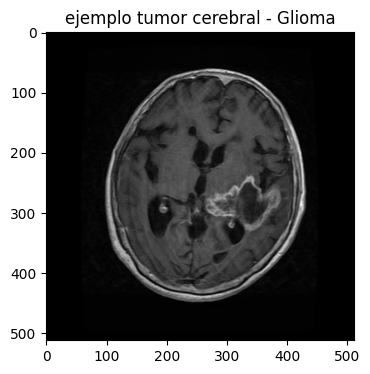

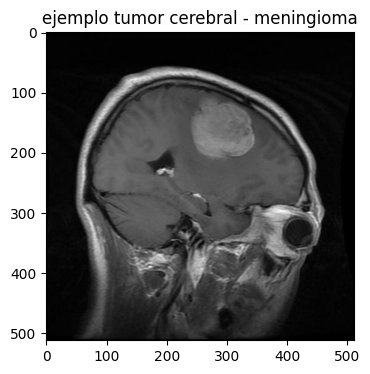

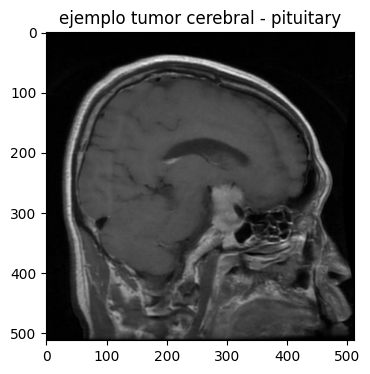

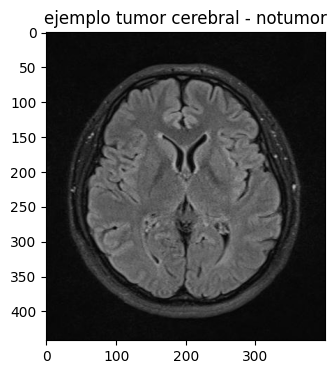

In [12]:
#Cargar imagen
#plt.figure(figsize=(20, 10))
imagen_glioma = cv2.imread(ejemplo_glioma)
imagen_meningioma = cv2.imread(ejemplo_meningioma)
imagen_pituitary = cv2.imread(ejemplo_pituitary)
imagen_notumor = cv2.imread(ejemplo_notumor)

# Mostrar imagen
#plt.subplot(1, 2, 1)
plt.figure(figsize=(8, 4))
plt.imshow(imagen_glioma)
plt.title('ejemplo tumor cerebral - Glioma')
alto, ancho = imagen_glioma.shape[:2]
print(f"Ancho de la imagen - glioma: {ancho} píxeles")
print(f"Alto de la imagen - glioma: {alto} píxeles")

##plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 4))
plt.imshow(imagen_meningioma)
plt.title('ejemplo tumor cerebral - meningioma')
alto, ancho = imagen_meningioma.shape[:2]
print(f"Ancho de la imagen - meningioma: {ancho} píxeles")
print(f"Alto de la imagen - meningioma: {alto} píxeles")

plt.figure(figsize=(8, 4))
plt.imshow(imagen_pituitary)
plt.title('ejemplo tumor cerebral - pituitary')
alto, ancho = imagen_pituitary.shape[:2]
print(f"Ancho de la imagen - pituitary: {ancho} píxeles")
print(f"Alto de la imagen - pituitary: {alto} píxeles")

plt.figure(figsize=(8, 4))
plt.imshow(imagen_notumor)
plt.title('ejemplo tumor cerebral - notumor')
alto, ancho = imagen_notumor.shape[:2]
print(f"Ancho de la imagen - notumor: {ancho} píxeles")
print(f"Alto de la imagen - notumor: {alto} píxeles")

#plt.tight_layout()
#plt.show()

# ***Resize***

In [13]:
nombre_directorio = "tumores_cerebrales_resized"
os.makedirs(nombre_directorio)
os.makedirs(os.path.join(nombre_directorio, "Training"))
os.makedirs(os.path.join(nombre_directorio, "Testing"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "glioma"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "meningioma"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "pituitary"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "notumor"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "glioma"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "meningioma"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "pituitary"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "notumor"))

In [14]:
Resized_training_glioma = '/content/tumores_cerebrales_resized/Training/glioma'
Resized_training_meningioma = '/content/tumores_cerebrales_resized/Training/meningioma'
Resized_training_pituitary = '/content/tumores_cerebrales_resized/Training/pituitary'
Resized_training_notumor = '/content/tumores_cerebrales_resized/Training/notumor'
Resized_testing_glioma = '/content/tumores_cerebrales_resized/Testing/glioma'
Resized_testing_meningioma = '/content/tumores_cerebrales_resized/Testing/meningioma'
Resized_testing_pituitary = '/content/tumores_cerebrales_resized/Testing/pituitary'
Resized_testing_notumor = '/content/tumores_cerebrales_resized/Testing/notumor'

In [15]:
input_directory_glioma = ruta_local_training_glioma
output_directory_glioma = Resized_training_glioma

input_directory_meningioma = ruta_local_training_glioma
output_directory_meningioma = Resized_training_meningioma

input_directory_pituitary = ruta_local_training_pituitary
output_directory_pituitary = Resized_training_pituitary

input_directory_notumor = ruta_local_training_notumor
output_directory_notumor = Resized_training_notumor

#test

input_directory_gliomat = ruta_local_testing_glioma
output_directory_gliomat = Resized_testing_glioma

input_directory_meningiomat = ruta_local_testing_glioma
output_directory_meningiomat = Resized_testing_meningioma

input_directory_pituitaryt = ruta_local_testing_pituitary
output_directory_pituitaryt = Resized_testing_pituitary

input_directory_notumort = ruta_local_testing_notumor
output_directory_notumort = Resized_testing_notumor

In [16]:
new_width = 512
new_height = 512

In [17]:
#glioma
os.makedirs(output_directory_glioma, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_glioma):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_glioma, filename)
        output_path = os.path.join(output_directory_glioma, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

#meningioma
os.makedirs(output_directory_meningioma, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_meningioma):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_meningioma, filename)
        output_path = os.path.join(output_directory_meningioma, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

#pituitary
os.makedirs(output_directory_pituitary, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_pituitary):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_pituitary, filename)
        output_path = os.path.join(output_directory_pituitary, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

  #notumor
os.makedirs(output_directory_notumor, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_notumor):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_notumor, filename)
        output_path = os.path.join(output_directory_notumor, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

In [18]:
#testing
#glioma
os.makedirs(output_directory_gliomat, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_gliomat):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_gliomat, filename)
        output_path = os.path.join(output_directory_gliomat, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

#meningioma
os.makedirs(output_directory_meningiomat, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_meningiomat):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_meningiomat, filename)
        output_path = os.path.join(output_directory_meningiomat, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

#pituitary
os.makedirs(output_directory_pituitaryt, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_pituitaryt):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_pituitaryt, filename)
        output_path = os.path.join(output_directory_pituitaryt, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

  #notumor
os.makedirs(output_directory_notumor, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_notumort):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_notumort, filename)
        output_path = os.path.join(output_directory_notumort, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

In [19]:
def leer_archivos_en_ruta_resized(rutarz: str) -> list:
  """
  Función encargada de leer todos los archivos que contiene cada carpeta
  """
  archivosrz = os.listdir(rutarz)
  nombre_seccion = rutarz.split("/")[-1]
  print(f"Cantidad de archivos - {nombre_seccion}: {len(archivosrz)}")
  print(f"{archivosrz[:5]}\n")
  return archivosrz

In [20]:
#Leer y revisar archivos
archivos_gliomarz = leer_archivos_en_ruta_resized(Resized_training_glioma)
archivos_meningiomarz = leer_archivos_en_ruta_resized(Resized_training_meningioma)
archivos_pituitaryrz = leer_archivos_en_ruta_resized(Resized_training_pituitary)
archivos_notumorrz = leer_archivos_en_ruta_resized(Resized_training_notumor)
archivos_gliomarzt = leer_archivos_en_ruta_resized(Resized_testing_glioma)
archivos_meningiomarzt = leer_archivos_en_ruta_resized(Resized_testing_meningioma)
archivos_pituitaryrzt = leer_archivos_en_ruta_resized(Resized_testing_pituitary)
archivos_notumorrzt = leer_archivos_en_ruta_resized(Resized_testing_notumor)

Cantidad de archivos - glioma: 1321
['Tr-gl_0046.jpg', 'Tr-gl_1071.jpg', 'Tr-gl_1146.jpg', 'Tr-gl_0281.jpg', 'Tr-gl_0155.jpg']

Cantidad de archivos - meningioma: 1321
['Tr-gl_0046.jpg', 'Tr-gl_1071.jpg', 'Tr-gl_1146.jpg', 'Tr-gl_0281.jpg', 'Tr-gl_0155.jpg']

Cantidad de archivos - pituitary: 1457
['Tr-pi_0064.jpg', 'Tr-pi_0502.jpg', 'Tr-pi_0167.jpg', 'Tr-pi_1094.jpg', 'Tr-pi_1327.jpg']

Cantidad de archivos - notumor: 1595
['Tr-no_0604.jpg', 'Tr-noTr_0004.jpg', 'Tr-no_1322.jpg', 'Tr-no_0924.jpg', 'Tr-no_1324.jpg']

Cantidad de archivos - glioma: 300
['Te-gl_0136.jpg', 'Te-gl_0185.jpg', 'Te-gl_0123.jpg', 'Te-gl_0090.jpg', 'Te-glTr_0003.jpg']

Cantidad de archivos - meningioma: 300
['Te-gl_0136.jpg', 'Te-gl_0185.jpg', 'Te-gl_0123.jpg', 'Te-gl_0090.jpg', 'Te-glTr_0003.jpg']

Cantidad de archivos - pituitary: 300
['Te-pi_0090.jpg', 'Te-pi_0268.jpg', 'Te-pi_0248.jpg', 'Te-pi_0270.jpg', 'Te-pi_0045.jpg']

Cantidad de archivos - notumor: 405
['Te-no_0010.jpg', 'Te-no_0148.jpg', 'Te-no_0208.j

Convertir imágenes a Numpy

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


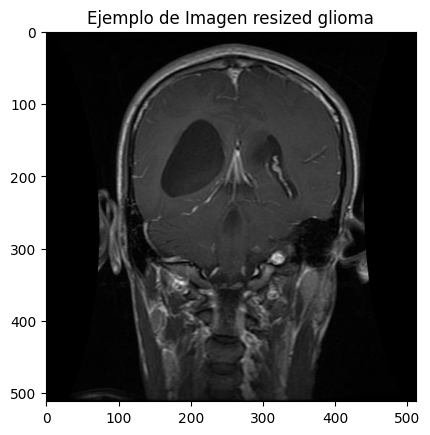

In [21]:
#Glioma
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_training_glioma

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized glioma')
plt.show()

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


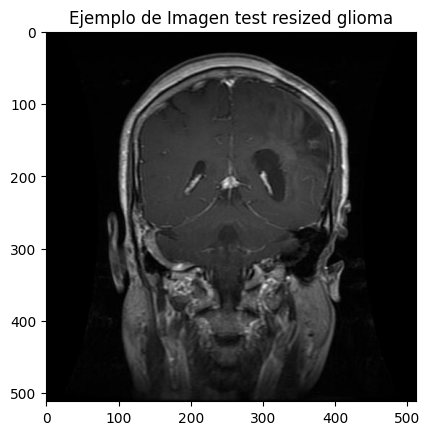

In [22]:
#Glioma test
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_testing_glioma

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen test resized glioma')
plt.show()

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


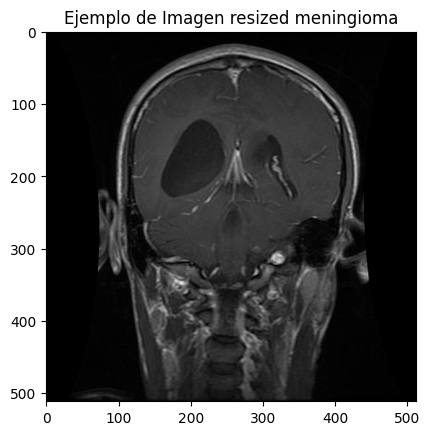

In [23]:
#Meningioma
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_training_meningioma

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized meningioma')
plt.show()

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


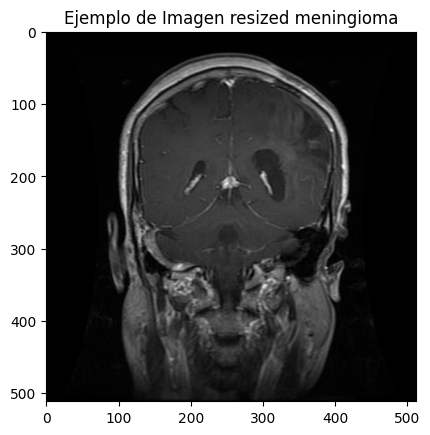

In [24]:
#Meningioma
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_testing_meningioma

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized meningioma')
plt.show()

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


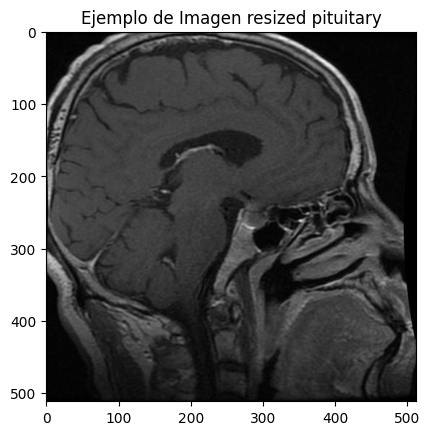

In [25]:
#pituitary
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_training_pituitary

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized pituitary')
plt.show()

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


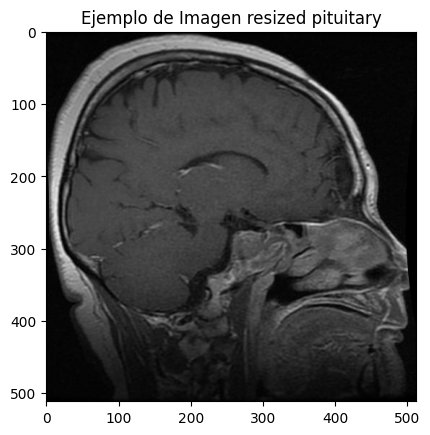

In [26]:
#pituitary test
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_testing_pituitary

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized pituitary')
plt.show()

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


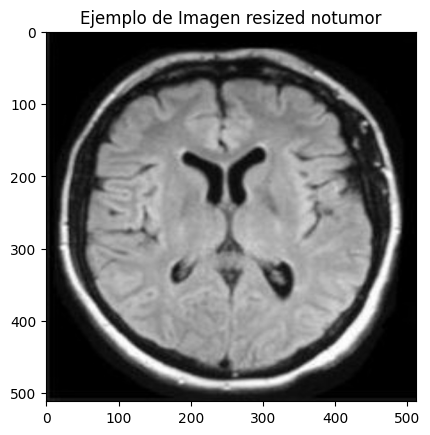

In [27]:
#notumor
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_training_notumor

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized notumor')
plt.show()

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


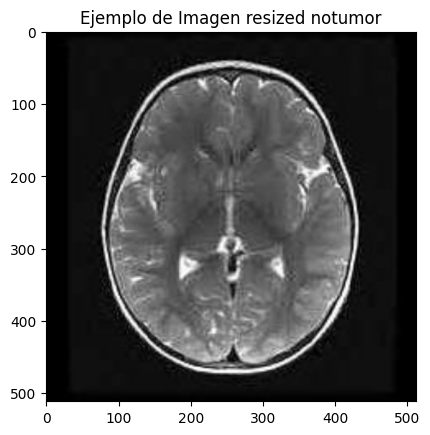

In [28]:
#notumor test
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_testing_notumor

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized notumor')
plt.show()

# **Clasificador con imágenes originales**

In [40]:
!pip install split-folders

In [42]:
!pip install plot_keras_history

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9455 sha256=7b5518d84f06eb34ea01c01bf34756d6c1afa5f592a20f9d899aee5f69b01d34
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321865 sha256=cec0562933a02630be303dddeb9b72c3d020445047faed65a03aaef7573b058c
  Stored in directory: /root/.cache/pip/wheels/30/9f/f5/37d037c39ac8b305590d5956f7021c6ca94b63c68be24f6841
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5631 sha256=cf421acf1f3c88d44699ba52ab1c23cdcae515114d107a4b0089811da9d6d632
  Stored in directo

In [43]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import warnings
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import random

import splitfolders

from collections import defaultdict

from plot_keras_history import plot_history

In [32]:
train_dir = '/content/tumores_cerebrales_resized/Training'
test_dir = '/content/tumores_cerebrales_resized/Testing'

In [33]:
splitfolders.ratio(train_dir, output="output", ratio=(0.8,0.2))
warnings.filterwarnings("ignore")

Copying files: 5694 files [00:01, 2896.99 files/s]


In [34]:
train_dir = '/content/output/train'
val_dir = '/content/output/val'

In [35]:
train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+"//" +label):
        train_paths.append(train_dir + '//'+label+ '//'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [36]:
val_paths = []
val_labels = []

for label in os.listdir(val_dir):
    for image in os.listdir(val_dir+"//" +label):
        val_paths.append(val_dir + '//'+label+ '//'+image)
        val_labels.append(label)

val_paths, val_labels = shuffle(val_paths, val_labels)

In [37]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+ '//' + label):
        test_paths.append(test_dir +'//'+label + '//'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

In [38]:
print("Tamaño del train: " + str(round(100*(len(train_paths)/(len(train_paths)+len(val_paths)+len(test_paths))))) + " %")
print("Tamaño del validación: " + str(round(100*(len(val_paths)/(len(train_paths)+len(val_paths)+len(test_paths))))) + " %")
print("Tamaño del test: " + str(round(100*(len(test_paths)/(len(train_paths)+len(val_paths)+len(test_paths))))) + " %")

Tamaño del train: 65 %
Tamaño del validación: 16 %
Tamaño del test: 19 %


modelooo

In [39]:
model = Sequential()

# Capa de red convolucional.
model.add(Conv2D(32,(3,3), input_shape=(512, 512, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de aplanamiento, una capa completamente conectada y la capa de salida.
model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy"])
warnings.filterwarnings("ignore")

In [40]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy"])
warnings.filterwarnings("ignore")

In [41]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False)
generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False)

train2 = generator_train.flow_from_directory('/content/output/train', target_size=(512, 512),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
val2 = generator_test.flow_from_directory('/content/output/val', target_size=(512, 512),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
test2 = generator_test.flow_from_directory('/content/tumores_cerebrales_resized/Testing', target_size=(512, 512),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 4553 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1305 images belonging to 4 classes.


In [42]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [43]:
callbacks2 = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [44]:
history_model = model.fit(train2, steps_per_epoch=len(train_paths)//32, epochs=10, validation_data=val2, validation_steps= len(val_paths)//32, callbacks=[early_stopping])


Epoch 1/10
142/142 [==============================] - 78s 385ms/step - loss: 1.7632 - categorical_accuracy: 0.6576 - val_loss: 9.0668 - val_categorical_accuracy: 0.2777
Epoch 2/10
142/142 [==============================] - 54s 379ms/step - loss: 0.5585 - categorical_accuracy: 0.7277 - val_loss: 35.0880 - val_categorical_accuracy: 0.2786
Epoch 3/10
142/142 [==============================] - 59s 417ms/step - loss: 0.5652 - categorical_accuracy: 0.7224 - val_loss: 11.1669 - val_categorical_accuracy: 0.3089
Epoch 4/10
142/142 [==============================] - 54s 383ms/step - loss: 0.3915 - categorical_accuracy: 0.7476 - val_loss: 0.5116 - val_categorical_accuracy: 0.7321
Epoch 5/10
142/142 [==============================] - 54s 381ms/step - loss: 0.3896 - categorical_accuracy: 0.7534 - val_loss: 0.4195 - val_categorical_accuracy: 0.7518
Epoch 6/10
142/142 [==============================] - 55s 384ms/step - loss: 0.3782 - categorical_accuracy: 0.7558 - val_loss: 0.4469 - val_categorical_a

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Categorical accuracy'}, xlabel='Epochs', ylabel='Categorical accuracy'>],
       dtype=object))

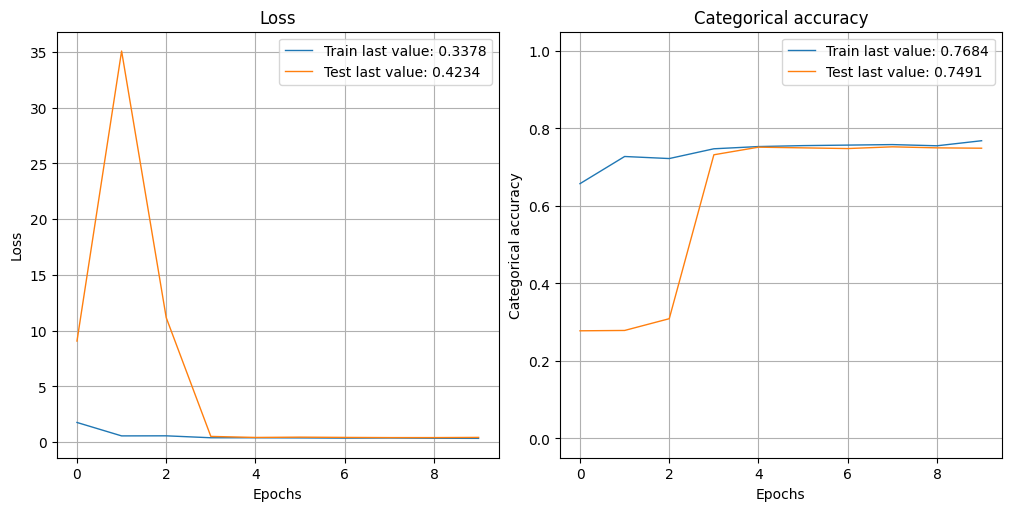

In [45]:
plot_history(history_model)

In [46]:
model.evaluate(test2)

41/41 [==============================] - 7s 167ms/step - loss: 0.3471 - categorical_accuracy: 0.7617


[0.3471459746360779, 0.761685848236084]

# **Clasificadorcon imagenes con mejora de contraste**

In [47]:
nombre_directorio = "tumores_cerebrales_contrast_resized"
os.mkdir(nombre_directorio)
os.makedirs(os.path.join(nombre_directorio, "Training"))
os.makedirs(os.path.join(nombre_directorio, "Testing"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "glioma"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "meningioma"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "pituitary"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "notumor"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "glioma"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "meningioma"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "pituitary"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "notumor"))

In [48]:
Contraste_training_glioma = '/content/tumores_cerebrales_contrast_resized/Training/glioma'
Contraste_training_meningioma = '/content/tumores_cerebrales_contrast_resized/Training/meningioma'
Contraste_training_pituitary = '/content/tumores_cerebrales_contrast_resized/Training/pituitary'
Contraste_training_notumor = '/content/tumores_cerebrales_contrast_resized/Training/notumor'
Contraste_testing_glioma = '/content/tumores_cerebrales_contrast_resized/Testing/glioma'
Contraste_testing_meningioma = '/content/tumores_cerebrales_contrast_resized/Testing/meningioma'
Contraste_testing_pituitary = '/content/tumores_cerebrales_contrast_resized/Testing/pituitary'
Contraste_testing_notumor = '/content/tumores_cerebrales_contrast_resized/Testing/notumor'

In [49]:
input_directory_cont_glioma = Resized_training_glioma
output_directory_cont_glioma = Contraste_training_glioma

input_directory_cont_meningioma = Resized_training_meningioma
output_directory_cont_meningioma = Contraste_training_meningioma

input_directory_cont_pituitary = Resized_training_pituitary
output_directory_cont_pituitary = Contraste_training_pituitary

input_directory_cont_notumor = Resized_training_notumor
output_directory_cont_notumor = Contraste_training_notumor

input_directory_cont_gliomat = Resized_testing_glioma
output_directory_cont_gliomat = Contraste_testing_glioma

input_directory_cont_meningiomta = Resized_testing_meningioma
output_directory_cont_meningiomat = Contraste_testing_meningioma

input_directory_cont_pituitaryt = Resized_testing_pituitary
output_directory_cont_pituitaryt = Contraste_testing_pituitary

input_directory_cont_notumort = Resized_testing_notumor
output_directory_cont_notumort = Contraste_testing_notumor

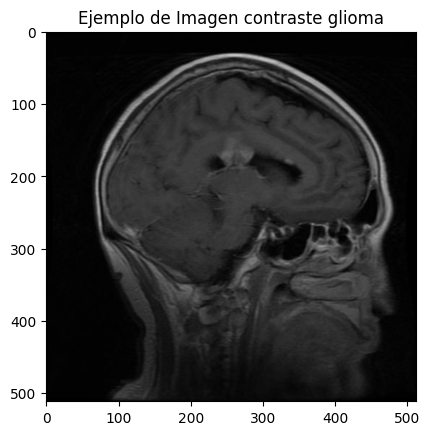

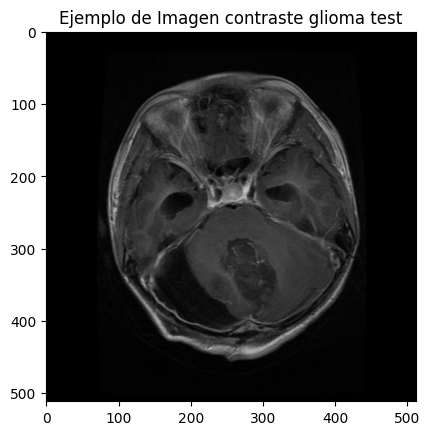

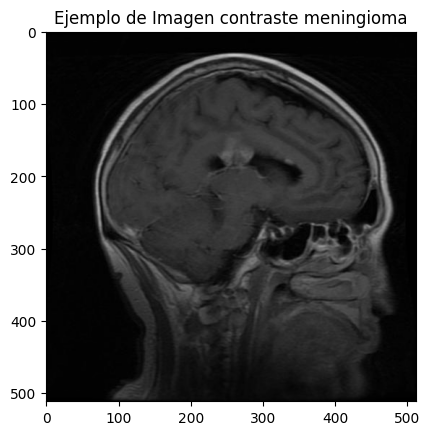

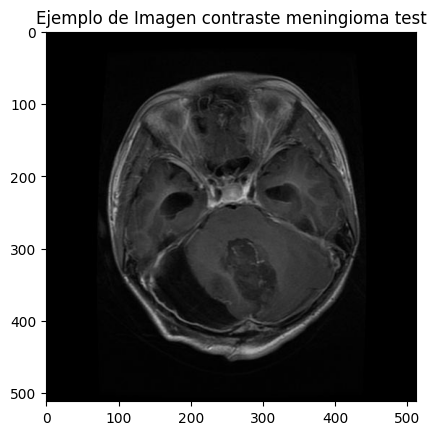

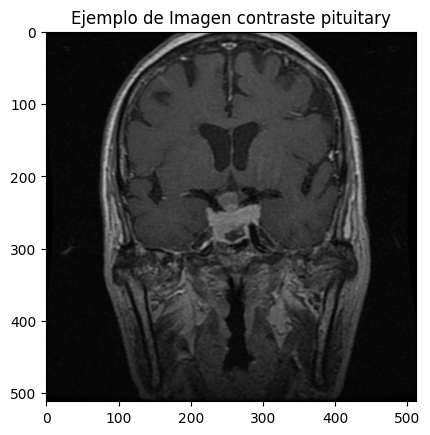

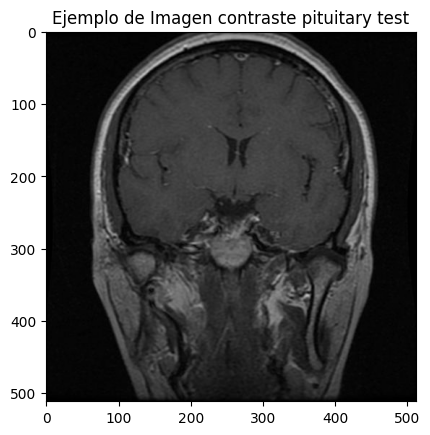

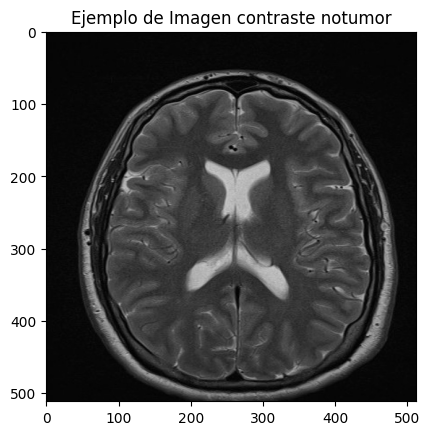

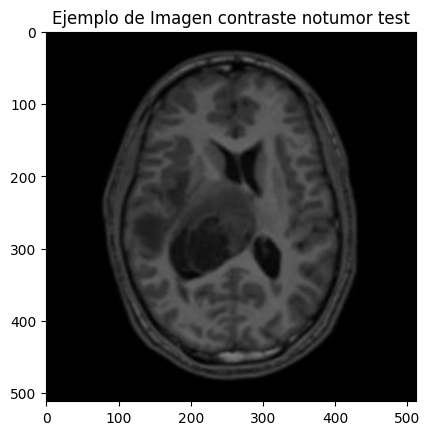

In [50]:
carpeta_img_rz_cont = Resized_training_glioma
carpeta_destino = Contraste_training_glioma

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)

    # Aplica el ajuste de contraste aquí, por ejemplo:
    alpha = 0.8  # Factor de contraste (ajusta según tus necesidades)
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste glioma')
plt.show()



carpeta_img_rz_cont = Resized_testing_glioma
carpeta_destino = Contraste_testing_glioma

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)


    alpha = 0.8  # Factor de contraste
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste glioma test')
plt.show()




carpeta_img_rz_cont = Resized_training_meningioma
carpeta_destino = Contraste_training_meningioma

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)


    alpha =  0.8 # Factor de contraste
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste meningioma')
plt.show()



carpeta_img_rz_cont = Resized_testing_meningioma
carpeta_destino = Contraste_testing_meningioma

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)

    alpha =  0.8 # Factor de contraste
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste meningioma test')
plt.show()




carpeta_img_rz_cont = Resized_training_pituitary
carpeta_destino = Contraste_training_pituitary

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)


    alpha = 0.8  # Factor de contraste
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste pituitary')
plt.show()



carpeta_img_rz_cont = Resized_testing_pituitary
carpeta_destino = Contraste_testing_pituitary

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)

    # Aplica el ajuste de contraste aquí, por ejemplo:
    alpha = 0.8  # Factor de contraste
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste pituitary test')
plt.show()




carpeta_img_rz_cont = Resized_training_notumor
carpeta_destino = Contraste_training_notumor

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)


    alpha = 0.8 # Factor de contraste
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste notumor')
plt.show()



carpeta_img_rz_cont = Resized_testing_notumor
carpeta_destino = Contraste_testing_notumor

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)

    alpha = 0.8
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste notumor test')
plt.show()


## **Clasificador - contraste**

In [51]:
trainCon_dir = '/content/tumores_cerebrales_contrast_resized/Training'
testCon_dir = '/content/tumores_cerebrales_contrast_resized/Testing'

In [52]:
splitfolders.ratio(trainCon_dir, output="output2", ratio=(0.8,0.2))
warnings.filterwarnings("ignore")

Copying files: 5694 files [00:01, 5174.12 files/s]


In [53]:
trainCon_dir = '/content/output2/train'
valCon_dir = '/content/output2/val'

In [54]:
train_paths2 = []
train_labels2 = []

for label in os.listdir(trainCon_dir):
    for image in os.listdir(trainCon_dir+"//" +label):
        train_paths2.append(trainCon_dir + '//'+label+ '//'+image)
        train_labels2.append(label)

train_paths2, train_labels2 = shuffle(train_paths2, train_labels2)

In [55]:
val_paths2 = []
val_labels2 = []

for label in os.listdir(valCon_dir):
    for image in os.listdir(valCon_dir+"//" +label):
        val_paths2.append(valCon_dir + '//'+label+ '//'+image)
        val_labels2.append(label)

val_paths2, val_labels2 = shuffle(val_paths2, val_labels2)

In [56]:
test_paths2 = []
test_labels2 = []

for label in os.listdir(test_dir):
    for image in os.listdir(testCon_dir+ '//' + label):
        test_paths2.append(testCon_dir +'//'+label + '//'+image)
        test_labels2.append(label)

test_paths2, test_labels2 = shuffle(test_paths2, test_labels2)

In [57]:
print("Tamaño del train: " + str(round(100*(len(train_paths2)/(len(train_paths2)+len(val_paths2)+len(test_paths2))))) + " %")
print("Tamaño del validación: " + str(round(100*(len(val_paths2)/(len(train_paths2)+len(val_paths2)+len(test_paths2))))) + " %")
print("Tamaño del test: " + str(round(100*(len(test_paths2)/(len(train_paths2)+len(val_paths2)+len(test_paths2))))) + " %")

Tamaño del train: 65 %
Tamaño del validación: 16 %
Tamaño del test: 19 %


modelooo

In [58]:
model = Sequential()

# Capa de red convolucional.
model.add(Conv2D(32,(3,3), input_shape=(512, 512, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de aplanamiento, una capa completamente conectada y la capa de salida.
model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy"])
warnings.filterwarnings("ignore")

In [59]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy"])
warnings.filterwarnings("ignore")

In [60]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False)
generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False)

train3 = generator_train.flow_from_directory('/content/output2/train', target_size=(512, 512),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
val3 = generator_test.flow_from_directory('/content/output2/val', target_size=(512, 512),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
test3 = generator_test.flow_from_directory('/content/tumores_cerebrales_contrast_resized/Testing', target_size=(512, 512),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 4553 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1305 images belonging to 4 classes.


In [61]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [62]:
history_model = model.fit(train3, steps_per_epoch=len(train_paths2)//32, epochs=10, validation_data=val3, validation_steps= len(val_paths2)//32, callbacks=[early_stopping])


Epoch 1/10
142/142 [==============================] - 57s 383ms/step - loss: 2.3161 - categorical_accuracy: 0.6693 - val_loss: 4.1653 - val_categorical_accuracy: 0.2562
Epoch 2/10
142/142 [==============================] - 54s 382ms/step - loss: 0.4988 - categorical_accuracy: 0.7248 - val_loss: 3.9985 - val_categorical_accuracy: 0.3714
Epoch 3/10
142/142 [==============================] - 55s 384ms/step - loss: 0.4190 - categorical_accuracy: 0.7432 - val_loss: 3.1870 - val_categorical_accuracy: 0.3938
Epoch 4/10
142/142 [==============================] - 55s 386ms/step - loss: 0.3816 - categorical_accuracy: 0.7554 - val_loss: 2.4465 - val_categorical_accuracy: 0.5214
Epoch 5/10
142/142 [==============================] - 55s 386ms/step - loss: 0.3754 - categorical_accuracy: 0.7505 - val_loss: 0.5608 - val_categorical_accuracy: 0.7437
Epoch 6/10
142/142 [==============================] - 60s 420ms/step - loss: 0.3626 - categorical_accuracy: 0.7585 - val_loss: 0.5763 - val_categorical_acc

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Categorical accuracy'}, xlabel='Epochs', ylabel='Categorical accuracy'>],
       dtype=object))

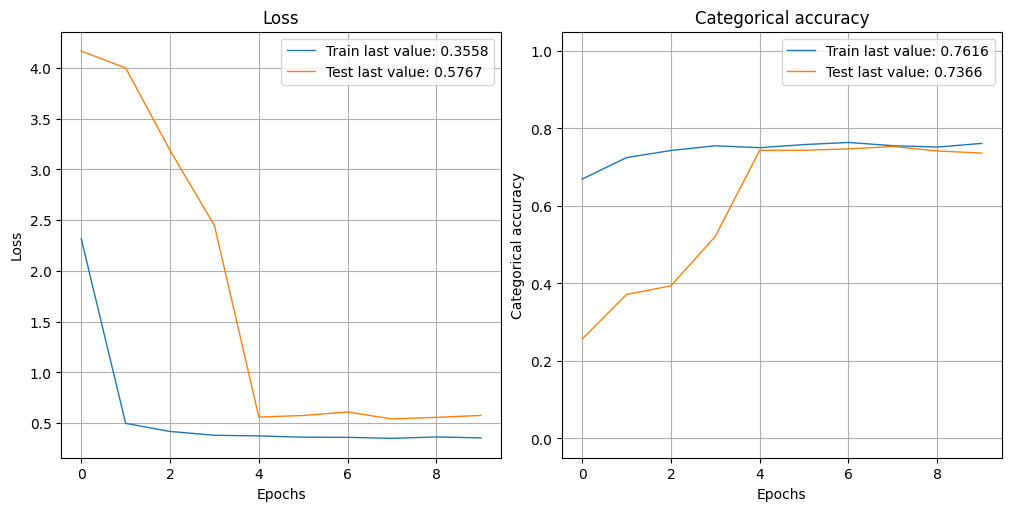

In [63]:
plot_history(history_model)

In [64]:
model.evaluate(test3)

41/41 [==============================] - 5s 125ms/step - loss: 0.3943 - categorical_accuracy: 0.7510


[0.3943212926387787, 0.7509578466415405]

# **Clasificador con imagenes con filtrado**

In [29]:
nombre_directorio = "tumores_cerebrales_filtro_resized"
os.mkdir(nombre_directorio)
os.makedirs(os.path.join(nombre_directorio, "Training"))
os.makedirs(os.path.join(nombre_directorio, "Testing"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "glioma"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "meningioma"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "pituitary"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "notumor"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "glioma"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "meningioma"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "pituitary"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "notumor"))

In [30]:
filtro_training_glioma = '/content/tumores_cerebrales_filtro_resized/Training/glioma'
filtro_training_meningioma = '/content/tumores_cerebrales_filtro_resized/Training/meningioma'
filtro_training_pituitary = '/content/tumores_cerebrales_filtro_resized/Training/pituitary'
filtro_training_notumor = '/content/tumores_cerebrales_filtro_resized/Training/notumor'
filtro_testing_glioma = '/content/tumores_cerebrales_filtro_resized/Testing/glioma'
filtro_testing_meningioma = '/content/tumores_cerebrales_filtro_resized/Testing/meningioma'
filtro_testing_pituitary = '/content/tumores_cerebrales_filtro_resized/Testing/pituitary'
filtro_testing_notumor = '/content/tumores_cerebrales_filtro_resized/Testing/notumor'

In [31]:
input_directory_filt_glioma = Resized_training_glioma
output_directory_filt_glioma = filtro_training_glioma

input_directory_filt_meningioma = Resized_training_meningioma
output_directory_filt_meningioma = filtro_training_meningioma

input_directory_filt_pituitary = Resized_training_pituitary
output_directory_filt_pituitary = filtro_training_pituitary

input_directory_filt_notumor = Resized_training_notumor
output_directory_filt_notumor = filtro_training_notumor

input_directory_filt_gliomat = Resized_testing_glioma
output_directory_filt_gliomat = filtro_testing_glioma

input_directory_filt_meningiomta = Resized_testing_meningioma
output_directory_filt_meningiomat = filtro_testing_meningioma

input_directory_filt_pituitaryt = Resized_testing_pituitary
output_directory_filt_pituitaryt = filtro_testing_pituitary

input_directory_filt_notumort = Resized_testing_notumor
output_directory_filt_notumort = filtro_testing_notumor

In [34]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def aplicar_filtro_pasa_altos(imagen):
    # Kernel Laplaciano para un filtro pasa altos
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]], dtype=np.float32)

    # Aplicar el filtro convolucional
    imagen_filtrada = cv2.filter2D(imagen, cv2.CV_64F, laplacian_kernel)

    return imagen_filtrada

def procesar_carpeta(carpeta_origen, carpeta_destino):
    for imagen_nombre in os.listdir(carpeta_origen):
        imagen_path = os.path.join(carpeta_origen, imagen_nombre)
        imagen = cv2.imread(imagen_path)

        # Aplicar el filtro pasa altos en lugar de ajustar el contraste
        nueva_imagen = aplicar_filtro_pasa_altos(imagen)

        # Guardar la nueva imagen en la carpeta de destino
        cv2.imwrite(os.path.join(carpeta_destino, 'filtro_' + imagen_nombre), nueva_imagen)

# Ejemplos de uso para cada categoría
procesar_carpeta(Resized_training_glioma, filtro_training_glioma)
procesar_carpeta(Resized_testing_glioma, filtro_testing_glioma)

procesar_carpeta(Resized_training_meningioma,filtro_training_meningioma)
procesar_carpeta(Resized_testing_meningioma, filtro_testing_meningioma)

procesar_carpeta(Resized_training_pituitary, filtro_training_pituitary)
procesar_carpeta(Resized_testing_pituitary, filtro_testing_pituitary)

procesar_carpeta(Resized_training_notumor, filtro_training_notumor)
procesar_carpeta(Resized_testing_notumor, filtro_testing_notumor)


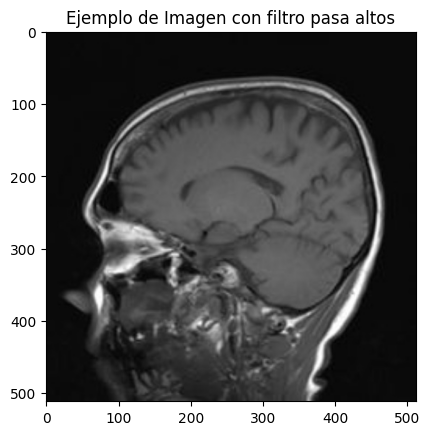

In [36]:

plt.imshow(imagen)
plt.title('Ejemplo de Imagen con filtro pasa altos')
plt.show()


## **Clasificador - Filtro pasa altos**

In [37]:
trainFilt_dir = '/content/tumores_cerebrales_filtro_resized/Training'
testFilt_dir = '/content/tumores_cerebrales_filtro_resized/Testing'

In [44]:
splitfolders.ratio(trainFilt_dir, output="output3", ratio=(0.8,0.2))
warnings.filterwarnings("ignore")

Copying files: 5694 files [00:02, 2613.01 files/s]


In [47]:
trainFilt_dir = '/content/output3/train'
valFilt_dir = '/content/output3/val'

In [48]:
train_paths3 = []
train_labels3 = []

for label in os.listdir(trainFilt_dir):
    for image in os.listdir(trainFilt_dir+"//" +label):
        train_paths3.append(trainFilt_dir + '//'+label+ '//'+image)
        train_labels3.append(label)

train_paths3, train_labels3 = shuffle(train_paths3, train_labels3)

In [49]:
val_paths3 = []
val_labels3 = []

for label in os.listdir(valFilt_dir):
    for image in os.listdir(valFilt_dir+"//" +label):
        val_paths3.append(valFilt_dir + '//'+label+ '//'+image)
        val_labels3.append(label)

val_paths3, val_labels3 = shuffle(val_paths3, val_labels3)

In [50]:
test_paths3 = []
test_labels3 = []

for label in os.listdir(testFilt_dir):
    for image in os.listdir(testFilt_dir+ '//' + label):
        test_paths3.append(testFilt_dir +'//'+label + '//'+image)
        test_labels3.append(label)

test_paths3, test_labels3 = shuffle(test_paths3, test_labels3)

In [51]:
print("Tamaño del train: " + str(round(100*(len(train_paths3)/(len(train_paths3)+len(val_paths3)+len(test_paths3))))) + " %")
print("Tamaño del validación: " + str(round(100*(len(val_paths3)/(len(train_paths3)+len(val_paths3)+len(test_paths3))))) + " %")
print("Tamaño del test: " + str(round(100*(len(test_paths3)/(len(train_paths3)+len(val_paths3)+len(test_paths3))))) + " %")

Tamaño del train: 65 %
Tamaño del validación: 16 %
Tamaño del test: 19 %


modelo

In [52]:
model = Sequential()

# Capa de red convolucional.
model.add(Conv2D(32,(3,3), input_shape=(512, 512, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de red convolucional.
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de aplanamiento, una capa completamente conectada y la capa de salida.
model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy"])
warnings.filterwarnings("ignore")

In [53]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy"])
warnings.filterwarnings("ignore")

In [57]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False)
generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False)

train4 = generator_train.flow_from_directory('/content/output3/train', target_size=(512, 512),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
val4 = generator_test.flow_from_directory('/content/output3/val', target_size=(512, 512),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
test4 = generator_test.flow_from_directory('/content/tumores_cerebrales_filtro_resized/Testing', target_size=(512, 512),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 4553 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1305 images belonging to 4 classes.


In [58]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [59]:
history_model = model.fit(train4, steps_per_epoch=len(train_paths3)//32, epochs=10, validation_data=val4, validation_steps= len(val_paths3)//32, callbacks=[early_stopping])


Epoch 1/10
142/142 [==============================] - 78s 426ms/step - loss: 2.2221 - categorical_accuracy: 0.6724 - val_loss: 47.2299 - val_categorical_accuracy: 0.2777
Epoch 2/10
142/142 [==============================] - 59s 413ms/step - loss: 0.7231 - categorical_accuracy: 0.7313 - val_loss: 115.7292 - val_categorical_accuracy: 0.2821
Epoch 3/10
142/142 [==============================] - 55s 384ms/step - loss: 0.6059 - categorical_accuracy: 0.7430 - val_loss: 151.8719 - val_categorical_accuracy: 0.2786
Epoch 4/10
142/142 [==============================] - 55s 384ms/step - loss: 0.3808 - categorical_accuracy: 0.7503 - val_loss: 89.4862 - val_categorical_accuracy: 0.2812
Epoch 5/10
142/142 [==============================] - 55s 388ms/step - loss: 0.4755 - categorical_accuracy: 0.7565 - val_loss: 3.4957 - val_categorical_accuracy: 0.4839
Epoch 6/10
142/142 [==============================] - 55s 386ms/step - loss: 0.3453 - categorical_accuracy: 0.7607 - val_loss: 0.9768 - val_categoric

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Categorical accuracy'}, xlabel='Epochs', ylabel='Categorical accuracy'>],
       dtype=object))

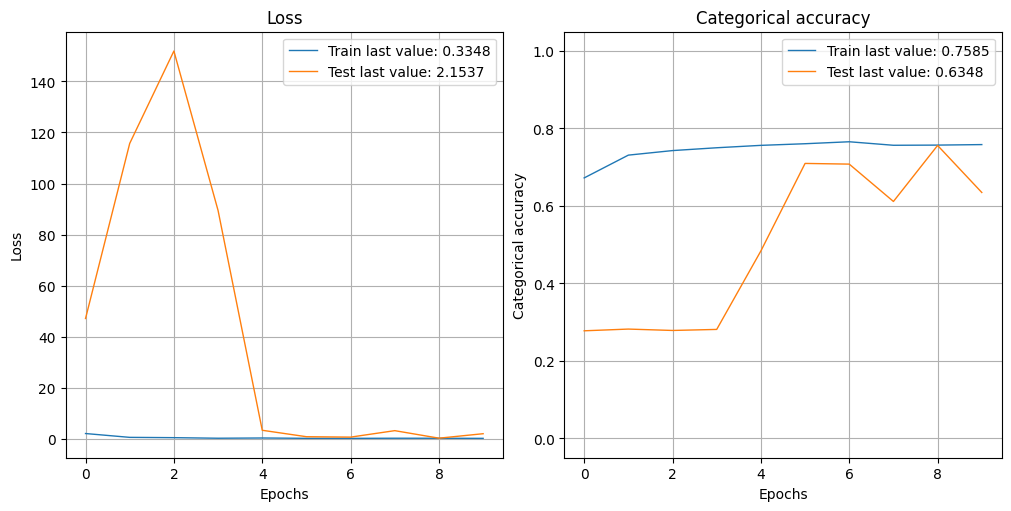

In [62]:
plot_history(history_model)

In [66]:
model.evaluate(test4)

41/41 [==============================] - 6s 132ms/step - loss: 1.7560 - categorical_accuracy: 0.6092


[1.7559996843338013, 0.6091954112052917]